In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2
from scipy.special import stdtr
from scipy.stats import t
from matplotlib.widgets import Slider, Button
%matplotlib notebook

# T-test

One of the problems with the Wald test is that it depends upon asymptotic relsuts.  As such we can only apply the Wald test when we have enough samples to ensure that we have asymptotic normality.  Recall that we used the Central Limit Theorem, and Slutsky's lemma to give us that our test statistic was at least asymptoticaly normal. So what if we were to just assume that the data we have for our test statistic is already derived from a normal distribution?  That get's us part way there.  At least we have removed the dependence on the Central Limit Theorem.  Next we need to remove the dependence on Slutsky's lemma.  How can we go about this?  We consider an example.

Suppose that we have a situation where we take 12 measurmenst of wind speed with the aim of determinining if it is feasable to install a wind turbine to generate power.  Suppose that the average wind speed needs to be 10 mph to make it practical.  Thus we have $X_1,\dots,X_12 \overset{\text{iid}}{\sim}\mathcal{N}(\mu, \sigma^2)$.  We are realy interested in only $\mu$ but we need to understand $\sigma^2$ in order to understand $\mu$.  We set up the hypothesis as

$$H_0: \mu \le 10$$
$$H_1: \mu \gt 10$$

We set the hypothesis up this way because we are looking for evidence to reject $H_0$ and we use the Neyman-Pearson paradigm to bias our decision making to reduce type 1 errors to a suitable level first.

So we already have that our data is i.i.d. normal we do not need the Central Limit Theorem because $\sqrt{n}\frac{\bar{X}_n - \mu}{\sigma}$ is already standard Gaussian distributed.  We are simply removing the mean and dividing by the standard deviation.  But this is not all we need.  The standard deviation is not know at this point and we will have to estimate it.  What we have used in the past is Slutsky's Lemma and that result depends on having large enough sample sizes.  So what can we do?  We make the claim that

$$S_n^2:= \frac{1}{n-1}\sum_{i=1}^n(X_i - \bar{X}_n)^2$$

is an unbiased estimator of $\sigma^2$

Note that this is close to the expression for the sample varriance but rather than scaling by $1/n$ we are scaling by $1/(n-1)$.  It is easy to see that

$$\sqrt{n}\frac{\bar{X}_n - \mu}{S_n}= \frac{\sqrt{n}\frac{\bar{X}_n - \mu}{\sigma}}{\sqrt{\frac{S_n^2}{\sigma^2}}}$$

Notice that the numerator is disrtibuted as a standar normal distribution, but what about the denominator?  Since we have divided by the population variance, in some sense the distribution should be scale invariant.  By this we mean that dividing by the population variance removes any dependence on the unknown population variance.  Before we can understand fully the denominator we will need to know a bit about the Chi Squared distribution.

## The Chi Squared Distribution: $\chi^2$

Definition:  The Chi Squared Distribution (sometimes Chi Square) with $k$ degrees of feedom is the distribution that governs the sum of $k$ squared standard normal random variables.  That is to say if we have $Z_1,\dots,Z_k \overset{\text{iid}}{\sim}\mathcal{N}(0,1)$, then $Z_1^2 +\dots+ Z_n^2 \sim \chi^2_k$

The simplest example is the square of a Gausian random vector.  Suppose that we have a a random vector with $k$ dimensions.  Thus we have $Z\sim\mathcal{N}_k(\bf{0}, I_k)$ then $||Z||^2_2\sim\chi^2_k$ where the norm is the usual $L_2$ norm.  That is $Z$ is a vector where each component is a standard normal random variable 

$$
  \begin{align}
    Z &= \begin{bmatrix}
           Z_{1} \\
           Z_{2} \\
           \vdots \\
           Z_{k}
         \end{bmatrix}
  \end{align}
$$

And the $L_2$ norm is 

$$||Z||_2 =\sqrt{ Z_1^2 + \dots + Z_k^2}$$

### Properties of the Chi Squared Distribution

The two things that we really want to know about a distribution are its centre, and its variance.  Let $V\sim\chi^2_k$ then by definition of $V$, the linearity of expectation and the second moment of a standard normal we get that

$$
\mathbb{E}[V]=\mathbb{E}\left[\sum_{i=1}^k Z_i^2\right]=\sum_{i=1}^k\mathbb{E}\left[ Z_i^2\right]=\sum_{i=1}^k 1=k
$$

To compute the variance we will make use of the fact that all of the random variables are independent.

$$
\text{var}[V]=
    \text{var}\left[ \sum_{i=1}^k Z_i^2\right]=
    \sum_{i=1}^k \text{var}[Z_i^2]=
    k(\mathbb{E}[Z^4]-\mathbb{E}[Z^2]^2)
$$

Now we have just seen that $\mathbb{E}[V]=k$ and since the square of a single Gaussian is a Chi Square with 1 degree of freedom, $\mathbb{E}[Z^2] = 1$.  Using integration by parts, or the moment generating function for the standard normal distribution one can show that $\mathbb{E}[Z^4]=3$ we get that

$$
\text{var}[V]= k(3-1)=2k
$$

### Sample Mean and Sample Variance  of IID Gaussians: Cochran's Theorem

Recall that we defined the sample variance as

$$S_n^2:= \frac{1}{n-1}\sum_{i=1}^n(X_i - \bar{X}_n)^2$$

And we were trying to understand the distribution of $\sqrt{\frac{S_n^2}{\sigma^2}}$.  The key to understanding that distribution is

#### Cochran's Theorem:
Let $X_1,\dots,X_n \overset{\text{iid}}{\sim}\mathcal{N}(\mu,\sigma^2)$, then

1) $$\frac{(n-1)S_n^2}{\sigma^2} = \sum_{i=1}^n\left(\frac{X_i - \bar{X}_n}{\sigma}\right)^2\sim \chi^2_{n-1}$$
2) $\bar{X}_n$ and $S_n^2$ are independent random variables

What is this theorem telling us?  Let's look at the definition of a Chi Squared distribution of degree n

$$
\chi_n^2=\sum_{i=1}^n\frac{(X_i - \mu)^2}{\sigma^2}
$$

The theorem tells us that if we replace $\mu$ with $\bar{X}_n$ then we get a Chi Squared distribution with $n-1$ degrees of freedom.  Or, replacing $\mu$ with the estimator $\bar{X}_n$ we loose one degree of freedom in our Chi Squared distribution.  So now we have a full description of our statistic of interest.  To summarize

$$
\frac{\sqrt{n}\frac{X_n-\mu}{\sigma}}{\sqrt{\frac{S_n^2}{\sigma^2}}} = \frac{Z}{\sqrt{\frac{V}{n-1}}}
$$

where $Z\sim\mathcal{N}(0,1)$ and $V \sim \chi^2_{n-1}$ are independent.

So to sumarize, we started out with $X_1,\dots,X_n\overset{\text{iid}}{\sim}\mathcal{N}(\mu, \sigma)$ where we do not know $\mu$ and $\sigma$ and by Cochran's Theorem we get a known distribution that does not depend on any unknown paramaters!  This distribution is given the name Student's T Distribution. 

### Student's T Distribution

The general definition of a Student's T Distribution with k degrees of freedom is

$$
\frac{Z}{\sqrt{V/k}}
$$

where $Z\sim\mathcal{N}(0,1)$ and $V\sim\chi^2_k$.  It is usualy denoted by $t_k$.

So what does this thing look like?  Since it is a standard Gaussian divided by something that is positive it will be symetric about $0$.  What happens when $k$ get's large?  Well,

$$
V/k=\frac{Z_1^2+\dots +Z_k^2}{k}
$$

which is an average of Gaussian random variables and by the law of large numbers that will converge to $\mathbb{E}[Z_1^2]=1$.  So in the limit as $k\to\infty$ the distribution will tend to a standard Gaussian.

Here is a little widget that let's you get a sense of what the degrees of freedom does to the shape of the distribution and how it converges to the standard Gaussian as the number of degrees of freedom increases.  Notice how in small degrees of freedom the distribution favours the tails, and how as the degrees of freedom increases the Student's T approaches the standard Gaussian.<a id="t-widget"></a>

<IPython.core.display.Javascript object>


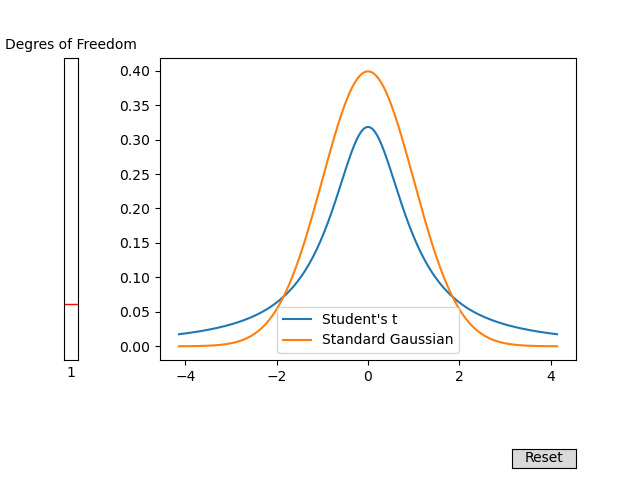

In [53]:
fig, ax = plt.subplots(1,1)

df_0 = 10

fig.subplots_adjust(left=0.25, bottom=0.25)
axdf = fig.add_axes([0.1, 0.25, 0.0225, 0.63])

df_slider = Slider(
    ax=axdf,
    label='Degres of Freedom',
    valmin=1,
    valmax=50,
    valinit=df_0,
    orientation="vertical",
    valfmt="%0.0f"
)

x=np.linspace(t.ppf(0.001,df_slider.val), t.ppf(0.999,df_slider.val), 201)
line, = ax.plot(x,t.pdf(x,df_0),label="Student's t")

# for comparison purposes we draw in a standard Gaussian
gaussian, = ax.plot(x,norm.pdf(x,0,1), label="Standard Gaussian")
ax.legend()

def update(val):
    # sequence of x values to use for plotting
#    x=np.linspace(norm.ppf(0.01, df_slider.val), norm.ppf(0.99, df_slider.val),201)
    line.set_ydata(t.pdf(x,df_slider.val))
#    ax.set_ylim([0,chi2.cdf(chi2.ppf(0.01, 1),1)])
    fig.canvas.draw_idle()
    
def reset(event):
    df_slider.reset()

resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, "Reset", hovercolor="0.975")

button.on_clicked(reset)
df_slider.on_changed(update)
plt.show()

Now that we have the infrastructure in place to deal with small sample sizes, let's return to our original problem of the average wind speed.  So we have $X_1,\dots,X_12 \overset{\text{iid}}{\sim} \mathcal{N}(\mu, \sigma^2)$ where both $\mu$ and $\sigma^2$ are unknown.  Since the number of samples is small we are not in the positon of being able to use Wald's test, so we will use the T-test.  We have just seen that 

$$
\sqrt{n}\frac{\bar{X}_n - \mu}{S_n}\sim t_{n-1}
$$

The T-tests are given by:

$$
\begin{array}{r|c|c|c}
&
\begin{array}{c}H_0: \mu = \mu_0 \\ H_1: \mu \ne \mu_0\end{array} &
\begin{array}{c}H_0: \mu \le \mu_0 \\ H_1: \mu \gt \mu_0\end{array} &
\begin{array}{c}H_0: \mu \ge \mu_0 \\ H_1: \mu \lt \mu_0\end{array} &   \\
\hline
\text{T-test: } \psi&\mathbb{1}\{|T|\gt q^{t_{n-1}}_{\alpha/2}\}&\mathbb{1}\{ T \gt q^{t_{n-1}}_\alpha\}&\mathbb{1}\{ T \lt q^{t_{n-1}}_\alpha\} \\
\end{array}
$$

where

$$
T = \sqrt{n}\frac{\bar{X}_n - \mu_0}{S_n} \text{ and } \mathbb{P}[t_{n-1} \gt q^{t_{n-1}}_{\alpha}] =  \alpha
$$

The level of this test is $\alpha$ and since we know the exact distribution we do not have an asymptotic level but a non-asymptotic level.

<IPython.core.display.Javascript object>


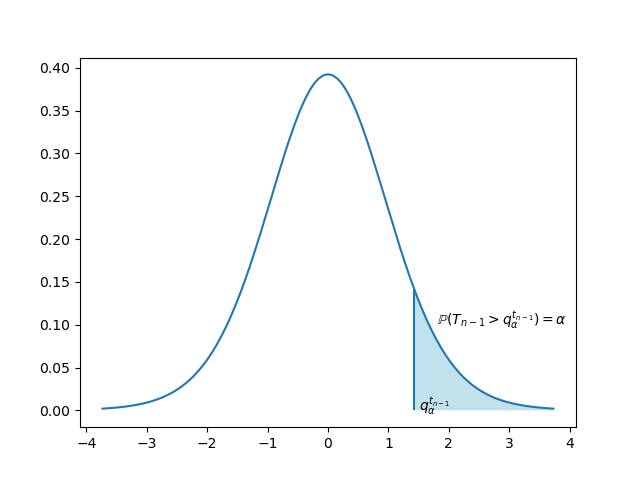

In [56]:
fig, ax = plt.subplots(1,1)

# we have 8 data points so the degrees of freedom is 7
mu_0 = 3.5
df = 15
x_bar_n = 4.5
S_n = 2.8
 
# our test statistic is 
t_n = ((df+1)**0.5)*((x_bar_n - mu_0)/S_n)
# we plot lines at the boundary points
ax.vlines([t_n], 0, t.pdf(t_n,df))

x=np.linspace(t.ppf(0.001,df), t.ppf(0.999,df), 201)
line, = ax.plot(x,t.pdf(x,df),label="Student's t\n" + str(df) + " degrees of freedom" )
x_right=np.linspace(t_n, x[200],201)
ax.fill_between(x_right, t.pdf(x_right,df), alpha=0.75, facecolor='lightblue')
plt.text(1.5,0,"$q^{t_{n-1}}_{\\alpha}$")
plt.annotate("$\mathbb{P}(T_{n-1}>q^{t_{n-1}}_{\\alpha})=\\alpha$",(3,0.01),(1.8,0.1))
plt.show()

In our concrete case we have 12 observations and suppose that the sample mean, $\bar{X}_n = 14.3$ and the sample standard deviation $S_n$ is $4.7$.  The edge case that we are interested in is $\mu_0=10$.  So our hypotheses are:

$$
H_0: \mu \le 10
$$
$$
H_1: \mu \gt 10
$$

Then $$T=\sqrt{12}\frac{14.3 - 10}{4.7}=3.17$$

Say we want to test at level $5\%$.  What is the critical value at this level?

In [31]:
df=11
q_alpha_11 = t.ppf(0.95,df)
print(f'Critical value at 5 percent: %.3f' %q_alpha_11)

Critical value at 5 percent: 1.796


Since our test statistic is larger than the critical value we reject the null hypothesis and conclude that we have evidence that $\mu$ is larger than $10$.  What is the p-value for this test?  Guided by how we computed p-values in the case of the Wald test we can extend our table above as follows:

$$
\begin{array}{r|c|c|c}
&
\begin{array}{c}H_0: \mu = \mu_0 \\ H_1: \mu \ne \mu_0\end{array} &
\begin{array}{c}H_0: \mu \le \mu_0 \\ H_1: \mu \gt \mu_0\end{array} &
\begin{array}{c}H_0: \mu \ge \mu_0 \\ H_1: \mu \lt \mu_0\end{array} &   \\
\hline
\text{T-test: } &\mathbb{1}\{|T|\gt q^{t_{n-1}}_{\alpha/2}\}&\mathbb{1}\{ T \gt q^{t_{n-1}}_\alpha\}&\mathbb{1}\{ T \lt q^{t_{n-1}}_\alpha\} \\
\hline
\text{p-value: }&\mathbb{P}\{|T|\gt |T^{\text{obs}}|\}&\mathbb{P}\{ T \gt T^{\text{obs}}&\mathbb{P}\{ T \lt T^{\text{obs}} \\
\end{array}
$$

Where $T^{\text{obs}}$ is the realized value of our $T$ statistic when we get some data.

So in our example we compute this by looking at the following probability

$$
\mathbb{P}[t_{11} \gt 3.17] = 1 - \mathbb{P}[t_{11} \le 3.17]
$$

In [34]:
df=11
p_value = 1-t.cdf(3.17,df)
print(f'p-value: %.5f' %p_value)

p-value: 0.00446


So, how much evidence do we have?  Based on our evidence scale we can say that we have very strong evidence that the mean wind speed is greater than 10mph.

##### Exercises:

We are asked to compute the p-value for the following test:

$$H_0: \mu=1$$
$$H_1: \mu\ne 1$$

With the following data

$$\bar{X}_n = 1.2$$
$$n = 8$$
$$S_n = 0.27$$

For the test statistic

$$T_n = \sqrt{n}\left( \frac{\bar{X}_n - \mu_0}{S_n}\right)$$

We note that we are in the regieme of a two sided test.  Here is a quick picture of what we are looking for:

<IPython.core.display.Javascript object>


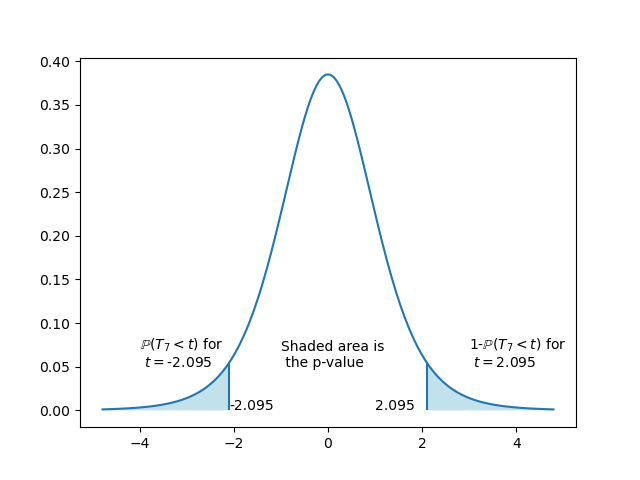

In [35]:
fig, ax = plt.subplots(1,1)

# we have 8 data points so the degrees of freedom is 7
df = 7
mu_0 = 1
x_bar_n = 1.2
S_n = 0.27
 
# our test statistic is 
t_n = ((df+1)**0.5)*((x_bar_n - mu_0)/S_n)
# we plot lines at the boundary points
ax.vlines([-t_n,t_n], 0, t.pdf(t_n,df))

x=np.linspace(t.ppf(0.001,df), t.ppf(0.999,df), 201)
line, = ax.plot(x,t.pdf(x,df),label="Student's t\n" + str(df) + " degrees of freedom" )
x_left=np.linspace(x[0],-t_n,201)
ax.fill_between(x_left, t.pdf(x_left,df), alpha=0.75, facecolor='lightblue')
x_right=np.linspace(t_n, x[200],201)
ax.fill_between(x_right, t.pdf(x_right,df), alpha=0.75, facecolor='lightblue')
plt.text(-1,0.05,"Shaded area is\n the p-value")
plt.text(-t_n,0,str(round(-t_n,3)))
plt.text(1,0,str(round(t_n,3)))
plt.annotate("$\mathbb{P}(T_7<t)$ for\n $t=$" + str(round(-t_n,3)),(-3,0.01),(-4,0.05))
plt.annotate("1-$\mathbb{P}(T_7<t)$ for\n $t=$" + str(round(t_n,3)),(3,0.01),(3,0.05))
plt.show()

In [36]:
t_n=(8**0.5)*((1.2 -1)/0.27)
p_value=2*t.cdf(-t_n,7)
print("Value of test statistic: " + str(round(t_n,3)))
print("p-value based on Student's T distribution with 7 degrees of freedom: " + str(round(p_value,3)))

Value of test statistic: 2.095
p-value based on Student's T distribution with 7 degrees of freedom: 0.074


Next we are asked to consider the test:

$$H_0: \mu\le3.5$$
$$H_1: \mu\gt 3.5$$

With the following data

$$\bar{X}_n = 5.2$$
$$n = 16$$
$$S_n = 2.8$$

In this case we have a one sided test.  Here is the picture:

<IPython.core.display.Javascript object>


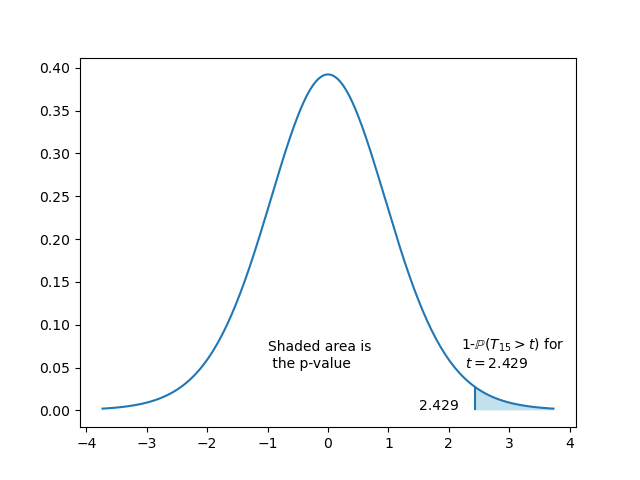

In [37]:
fig, ax = plt.subplots(1,1)

# we have 16 data points so the degrees of freedom is 15
mu_0 = 3.5
df = 15
x_bar_n = 5.2
S_n = 2.8
 
# our test statistic is 
t_n = ((df+1)**0.5)*((x_bar_n - mu_0)/S_n)
# we plot lines at the boundary points
ax.vlines([t_n], 0, t.pdf(t_n,df))

x=np.linspace(t.ppf(0.001,df), t.ppf(0.999,df), 201)
line, = ax.plot(x,t.pdf(x,df),label="Student's t\n" + str(df) + " degrees of freedom" )
x_right=np.linspace(t_n, x[200],201)
ax.fill_between(x_right, t.pdf(x_right,df), alpha=0.75, facecolor='lightblue')
plt.text(-1,0.05,"Shaded area is\n the p-value")
plt.text(1.5,0,str(round(t_n,3)))
plt.annotate("1-$\mathbb{P}(T_{15}>t)$ for\n $t=$" + str(round(t_n,3)),(3,0.01),(2.2,0.05))
plt.show()

In [40]:
t_n=(16**0.5)*((5.2 -3.5)/2.8)
p_value=1-t.cdf(t_n,15)
print("Value of test statistic: " + str(round(t_n,3)))
print("p-value based on Student's T distribution with 15 degrees of freedom: " + str(round(p_value,4)))

Value of test statistic: 2.429
p-value based on Student's T distribution with 15 degrees of freedom: 0.0141


In the next two questions we have that $X_1, ..., X_n \overset{\text{iid}}{\sim} \mathcal{N}(\mu,\sigma^2)$.  Both parameters are unknown.  Compute the p-value in each case.

$$H_0: \mu\ge 50$$
$$H_1: \mu\lt 50$$

With the following data

$$\bar{X}_n = 36.1$$
$$n = 4$$
$$S_n = 8.6$$

And 

$$H_0: \mu=-6$$
$$H_1: \mu\ne -6$$

With the following data

$$n = 3$$
$$X_1=-3.81, X_2=-4.40, X_3=-0.93$$

We look at the second case.

This is a two sided test where we are testing the value $\mu = -6$

<IPython.core.display.Javascript object>


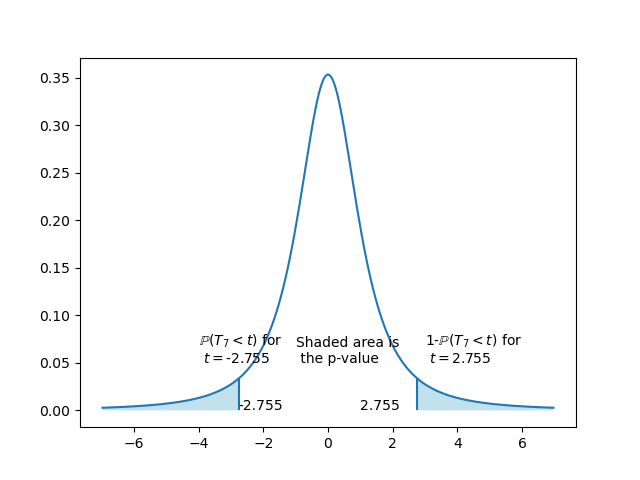

1.856672651097477


In [44]:
fig, ax = plt.subplots(1,1)

X_n = [-3.81, -4.40, -0.93]
df = 2
mu_0 = -6
x_bar_n = np.mean(X_n)
S_n = np.std(X_n,ddof=1)
print(S_n)
 
# our test statistic is 
t_n = ((df+1)**0.5)*((x_bar_n - mu_0)/S_n)
# we plot lines at the boundary points
ax.vlines([-t_n,t_n], 0, t.pdf(t_n,df))

x=np.linspace(t.ppf(0.01,df), t.ppf(0.99,df), 201)
line, = ax.plot(x,t.pdf(x,df),label="Student's t\n" + str(df) + " degrees of freedom" )
x_left=np.linspace(x[0],-t_n,201)
ax.fill_between(x_left, t.pdf(x_left,df), alpha=0.75, facecolor='lightblue')
x_right=np.linspace(t_n, x[200],201)
ax.fill_between(x_right, t.pdf(x_right,df), alpha=0.75, facecolor='lightblue')
plt.text(-1,0.05,"Shaded area is\n the p-value")
plt.text(-t_n,0,str(round(-t_n,3)))
plt.text(1,0,str(round(t_n,3)))
plt.annotate("$\mathbb{P}(T_7<t)$ for\n $t=$" + str(round(-t_n,3)),(-3,0.01),(-4,0.05))
plt.annotate("1-$\mathbb{P}(T_7<t)$ for\n $t=$" + str(round(t_n,3)),(3,0.01),(3,0.05))
plt.show()

In [42]:
p_value=2*t.cdf(-2.755,2)
print("Value of test statistic: " + str(round(t_n,3)))
print("p-value based on Student's T distribution with 2 degrees of freedom: " + str(round(p_value,5)))

Value of test statistic: 2.755
p-value based on Student's T distribution with 2 degrees of freedom: 0.11037


In the first case we have

<IPython.core.display.Javascript object>


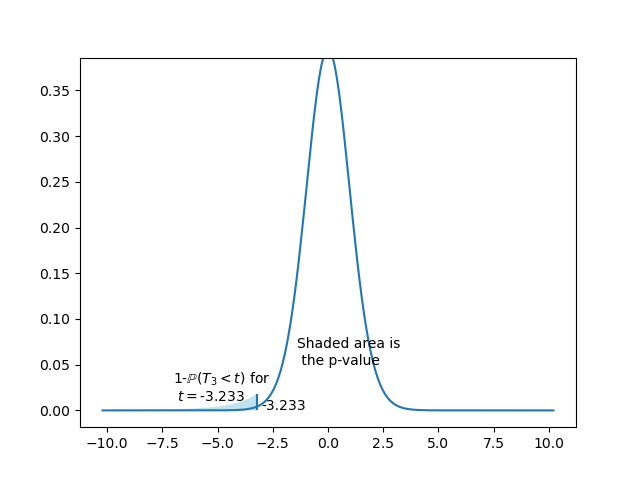

In [52]:
fig, ax = plt.subplots(1,1)

mu_0 = 50
df = 3
x_bar_n = 36.1
S_n = 8.6
 
# our test statistic is 
t_n = ((df+1)**0.5)*((x_bar_n - mu_0)/S_n)
# we plot lines at the boundary points
ax.vlines([t_n], 0, t.pdf(t_n,df))

x=np.linspace(t.ppf(0.001,df), t.ppf(0.999,df), 201)
line, = ax.plot(x,t.pdf(x,df),label="Student's t\n" + str(df) + " degrees of freedom" )
x_left=np.linspace(x[0], t_n ,201)
ax.fill_between(x_left, t.pdf(x_left,df), alpha=0.75, facecolor='lightblue')
plt.text(-1.4,0.05,"Shaded area is\n the p-value")
plt.text(t_n + 0.2,0,str(round(t_n,3)))
plt.annotate("1-$\mathbb{P}(T_{3}< t)$ for\n $t=$" + str(round(t_n,3)),(-6,0.01),(-7,0.01))
plt.show()

In [51]:
p_value=t.cdf(-3.233,3)
print("Value of test statistic: " + str(round(t_n,3)))
print("p-value based on Student's T distribution with 2 degrees of freedom: " + str(round(p_value,5)))

Value of test statistic: -3.233
p-value based on Student's T distribution with 2 degrees of freedom: 0.02405


# Comparing the T-test to the Wald test

So the T-test gives us an exact test in the sense that we know the distribution of the test statistic so it gives us non-asyptotic p-values.  Why would we want to use the Wald test?  There are two main reasons:

1) The Wald test is more specific.  It will reject the null hypothesis in cases where the T statistic is close to the boundary of the rejection region for the T test.

You can see this when you [compare the tails of a normal distribution to the tails of the T distribution.](#t-widget)  The tails of the T distribution are above the tails of the normal distribution.  If we denote the quantiles of the standard Gaussian as $q_\alpha$ and the quantiles of the T-distribution as $q^{t_{k}}_\alpha$, then $q^{t_{k}}_\alpha \lt q_\alpha$ if we are out in the tails of the distribution.  

2) The Wald test is more general in the sense that it can be used with any estimator you like, not just an estimator of the mean.

The T-test was designed to test the mean of a distribution only.  You can not use it as a test of the variance or of any other parameter of a distribution that is not the mean (like $\lambda$ in an exponential distribution).



## Two Sample T-tests and the Welch-Satterthwaite Formula

Recall our example of a clinical trial.  We have a two sample test where we are looking to determine if a drug has a positive effect on lowering LDL cholesterol.  We had two groups, a control and a test group.  We denote the expected decrease in LDL cholesterol as $\mu_d$ for the test group, the group that received the drug, and $\mu_c$ the expected decrease in the control group, the group that received a placebo.  Both of these were assumed to be positive since the placebo effect is a real phenomena.  We set up the null hypothesis as the drug is no more effective than the placebo and the alternative hypothesis is that the drug is more effective than the placebo.

$$
H_0: \mu_d - \mu_c \le 0
$$
$$
H_1: \mu_d - \mu_c \gt 0
$$

Suppose that we collect two independent samples, $X_1,\dots,X_n\overset{\text{iid}}{\sim}\mathcal{N}(\mu_d,\sigma^2_d)$ from the test group and $Y_1,\dots,Y_m\overset{\text{iid}}{\sim}\mathcal{N}(\mu_c,\sigma^2_c)$

Now using the fact that the $X_i$ and the $Y_j$ are independent we can write our test statistic as

$$
\frac{\bar{X}_n - \bar{Y}_m -(\mu_d - \mu_c)}{\sqrt{\frac{\sigma_d^2}{n} + \frac{\sigma_m^2}{m}}} \sim \mathcal{N}(0,1)
$$

All would be fine if we had that $n$ and $m$ were large enought for Slutsky to kick in.  We would just find a consistent estimator for $\sigma^2_d$ say $\hat{\sigma}^2_d$ and similarly for the control and use those in place of $\sigma^2_d$ and $\sigma^2_c$ and use asymptotic results.  But what happens when we don't have enough samples?  Can we use the T-test machinery in this case?

Let's try.  If we denote the sample variance for the drug and control groups as

$$
S_d^2=\frac{1}{n-1}\sum_{i=1}^n(X_i - \bar{X}_n) \text{ and } S_c^2=\frac{1}{m-1}\sum_{i=1}^m(Y_i - \bar{Y}_m)
$$

Then as we had with the case of the single sample T-test we use the fact that the two samples are independent to get that the standard deviation of $\bar{X}_n-\bar{Y}_m$ is $\sqrt{\frac{\sigma^2_d}{n} + \frac{\sigma^2_m}{m}}$ and rescale by the standard deviation to get this monster:

$$
\frac{\bar{X}_n - \bar{X}_m - (\mu_d - \mu_c)}{\sqrt{\frac{S^2_d}{n} + \frac{S^2_c}{m}}}=
\frac{\frac{\bar{X}_n - \bar{Y}_m - (\mu_d- \mu_c)}{\sqrt{\frac{\sigma^2_d}{n} + \frac{\sigma^2_c}{m}}}}{\sqrt{\frac{\frac{S^2_d}{n} + \frac{S^2_m}{m}}{\frac{\sigma^2_d}{n} + \frac{\sigma^2_c}{m}}}}
$$

Looking at the numerator of the right hand side we recognize this as a standard normal distribution.  But what about the denominator? It turns out that there is an approximation called the Welch-Satterthwaite formula (WS) that gets us around the whole issue.

It is true that our left hand side is already approximatley a T-distribution with $N$ degrees of freedom

$$
\frac{\bar{X}_n - \bar{X}_m - (\mu_d - \mu_c)}{\sqrt{\frac{S^2_d}{n} + \frac{S^2_c}{m}}} \approx t_N
$$

where

$$
N = \frac{\left(\frac{S^2_d}{n} + \frac{S^2_c}{m}\right)^2}{\frac{S^4_d}{n^2(n-1)} + \frac{S^4_c}{m^2(m-1)}}\ge \text{min}(n,m) -1
$$

If we look at the formula to see what happens if $m\to \infty$ we see that the second terms in both the numerator and denominator go to $0$ and we are left with $n-1$.

### Example: Non-asymptotic test.

Suppose in our drug test example we have the following data: $n=12, m=22, \bar{X}_n=156.4, \bar{Y}_m=132.7, S_d=22.5, S_c=8.7$  We compute our test statistic

$$
T=\frac{156.4 - 132.7}{\sqrt{\frac{22.5^2}{12} + \frac{8.7^2}{22}}}=3.51
$$

Now what value of $N$ do we use to compute the p-values from?

$$
N = \frac{\left(22.5^2/12 + 8.7^2/22\right)^2}{\frac{22.5^4}{12^2 11} + \frac{8.7^4}{22^221}} = 12.82
$$

Since we are looking for a more conservative test so we round this down to 12.  The fewer the degrees of freedom we have the heavier the tails will be and that means that we will be more likely to fail to reject the null hypothesis.  That is what we mean by being conservative.

So what is the p-value?  That is given by $\mathbb{P}[t_{12} \gt 3.51]$

In [60]:
p_value=1-t.cdf(3.51,12)
print("p-value based on Student's T distribution with 12 degrees of freedom: " + str(round(p_value,5)))

p-value based on Student's T distribution with 12 degrees of freedom: 0.00215


So we reject the null hypothesis with strong evidence based on this data.